### Construct simulation network (09/19 meeting)

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_runner import plot_results, run_simulation, load_params

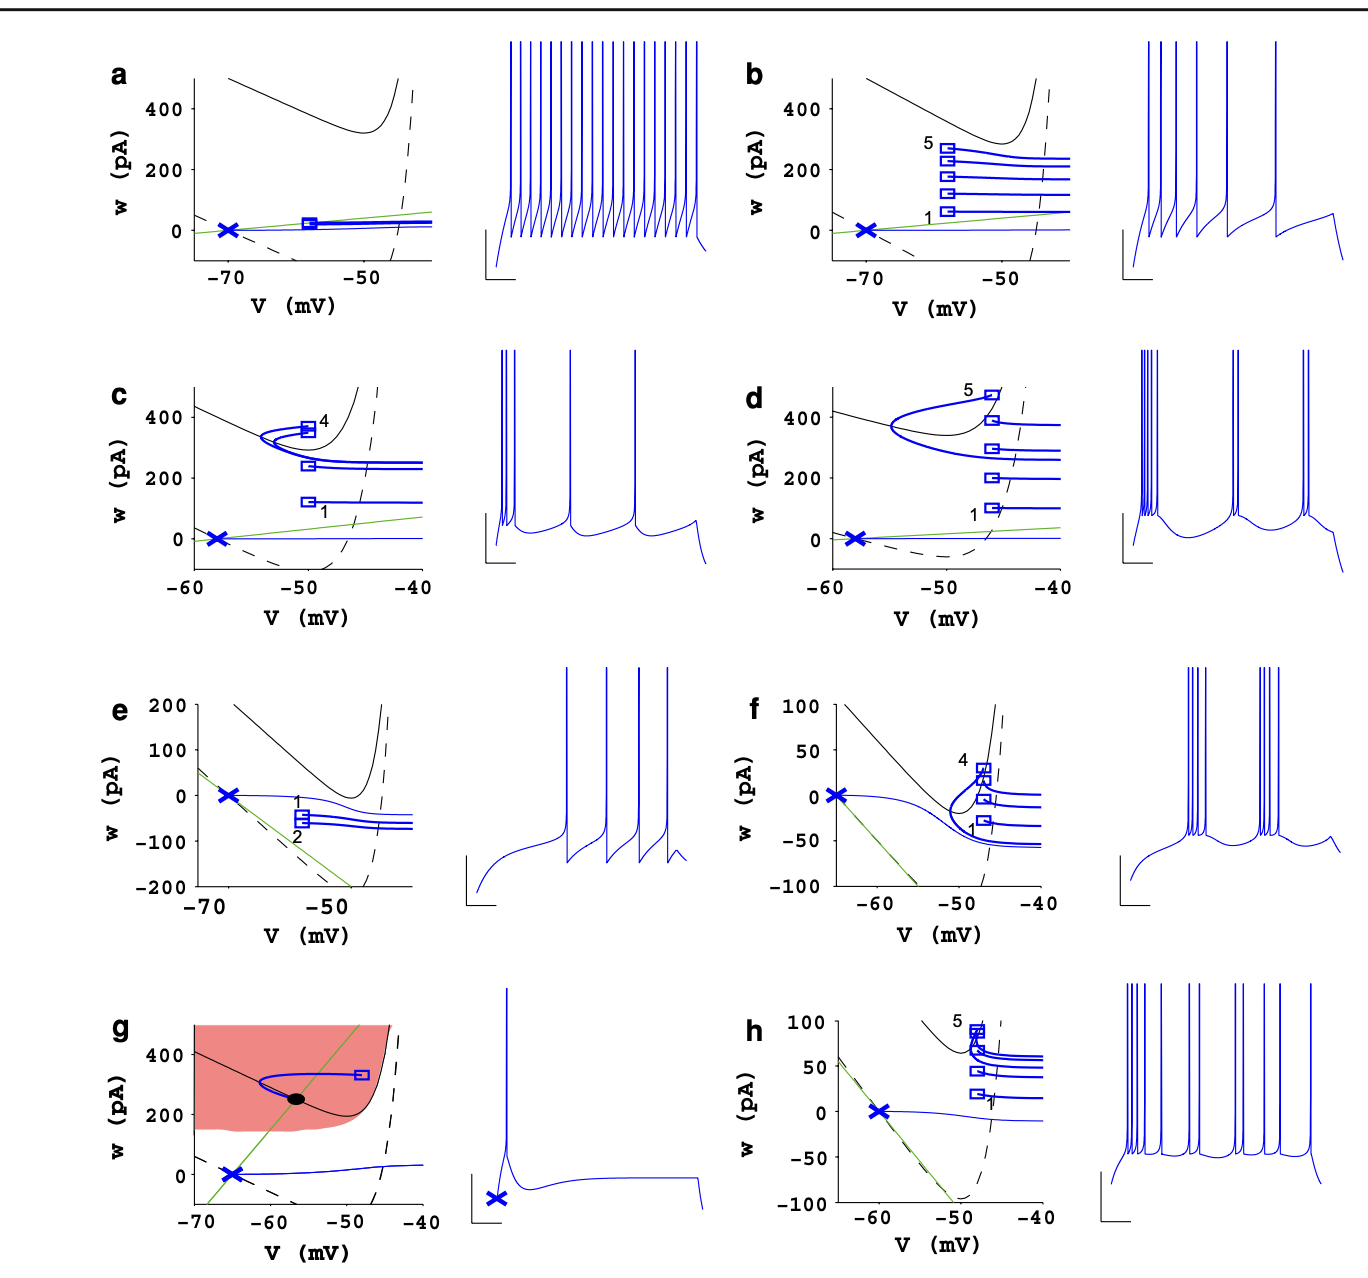

- V-nullcline: can determine Vt and leak conductance 

- a (tonic firing): absence of threshold voltage(low tauw, b = 0)
    - regular discharge of action potentials, constant spiking 
- b (adaptation): k value affects the first inter-spike intervals (high tauw than a)
    - increase interval because of frequency adaptation 
- c (initial burst): initial spike intensively generated, spiking starts with one or several sharp reset followed by broad reset (low C, high gL, EL) 


<Figure size 1500x800 with 0 Axes>

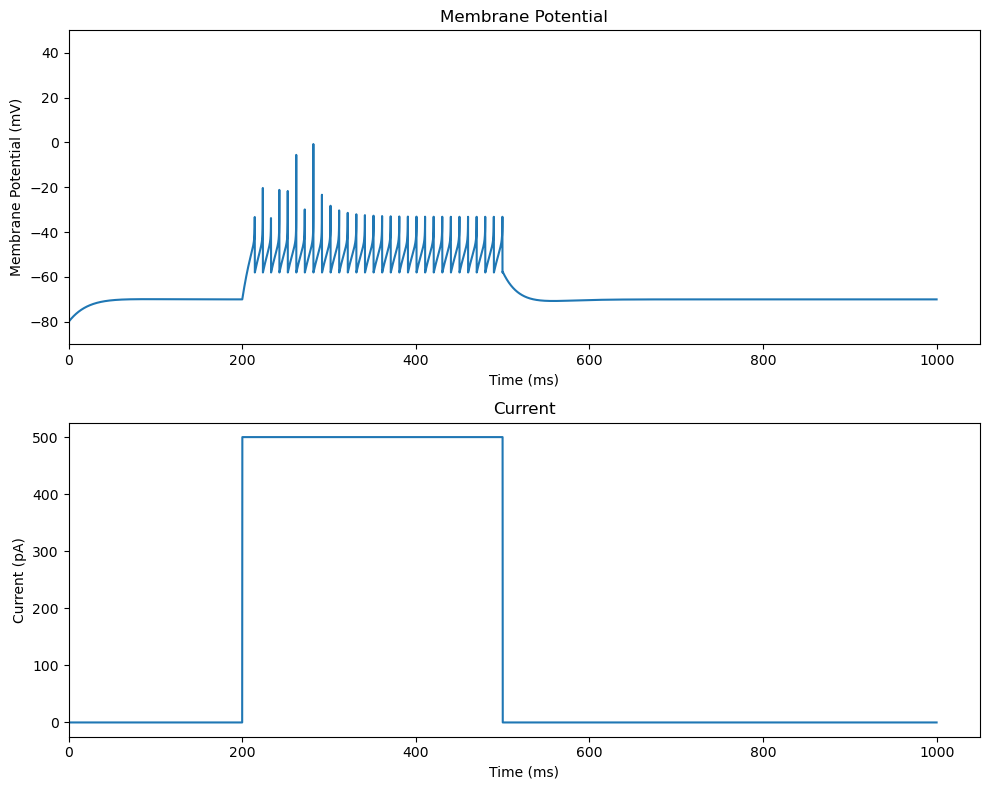

In [3]:
### AdEx simulation with various parameter in Fig 4
json_file = './params/AdEx_4a.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

### Noise
- Given the noisy nature of neuronal activity in vivo, neurons receive noisy time varying inputs
- Gausian noise 
- https://brian2.readthedocs.io/en/stable/user/models.html

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_I_noise import run_simulation, load_params, plot_results

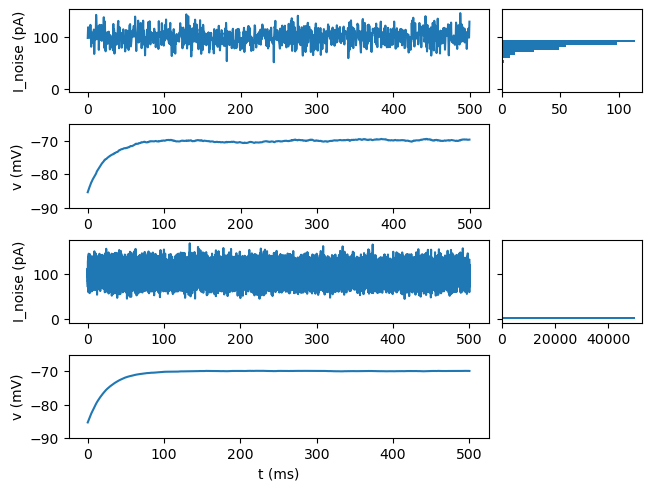

In [20]:
### Inject normal distribution white noise current 

mu_noise = 100*pA
sigma_noise = 15*pA
E_L = -85.4*mV
g_L = 6.46*nS
C = 157*pF

def run_sim(dt):
    defaultclock.dt = dt
    group = NeuronGroup(1,
                         '''dv/dt = (-g_L*(v - E_L) + I_noise)/C : volt
                            I_noise = mu_noise + sigma_noise*randn() : amp (constant over dt)''',
                        method='exact')
    group.v = E_L
    mon = StateMonitor(group, ['v', 'I_noise'], record=0)

    run(500*ms)
    return mon.t[:], mon.v[0], mon.I_noise[0]

t1, v1, I_noise1 = run_sim(0.5*ms)
t2, v2, I_noise2 = run_sim(0.01*ms)

fig, axs = plt.subplots(4, 2, sharey='row',
                       gridspec_kw={'width_ratios': [3, 1]},
                       constrained_layout=True)

axs[0, 0].plot(t1/ms, I_noise1/pA)
axs[0, 0].set_ylabel('I_noise (pA)')
axs[0, 1].hist(I_noise1/pA, bins=np.arange(0, 100, 5), orientation='horizontal')
axs[1, 0].plot(t1/ms, v1/mV)
axs[1, 0].set_ylim(-90, -65)
axs[1, 0].set_ylabel('v (mV)')
axs[1, 1].axis('off')

axs[2, 0].plot(t2/ms, I_noise2/pA)
axs[2, 0].set_ylabel('I_noise (pA)')
axs[2, 1].hist(I_noise2/nA, bins=np.arange(0, 100, 5), orientation='horizontal')
axs[3, 0].plot(t2/ms, v2/mV)
axs[3, 0].set_ylim(-90, -65)
axs[3, 0].set_ylabel('v (mV)')
axs[3, 1].axis('off')
axs[3, 0].set_xlabel('t (ms)')

plt.show()


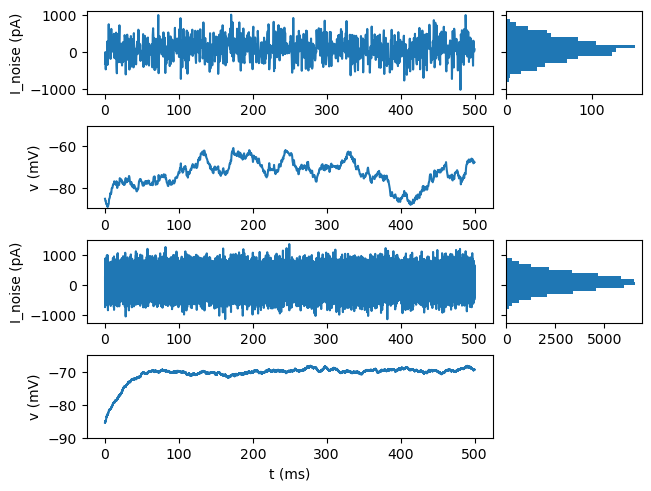

In [19]:
### Inject normal distribution white noise current 
# https://brian.discourse.group/t/implementation-of-stochastic-noise-in-a-hodgkin-huxley-model-but-as-a-current/787/10

mu_noise = 100*pA
sigma_noise = 300*pA
E_L = -85.4*mV
g_L = 6.46*nS
C = 157*pF

def run_sim(dt):
    defaultclock.dt = dt
    group = NeuronGroup(1,
                         '''dv/dt = (-g_L*(v - E_L) + I_noise)/C : volt
                            I_noise = mu_noise + sigma_noise*randn() : amp (constant over dt)''',
                        method='exact')
    group.v = E_L
    mon = StateMonitor(group, ['v', 'I_noise'], record=0)

    run(500*ms)
    return mon.t[:], mon.v[0], mon.I_noise[0]

t1, v1, I_noise1 = run_sim(0.5*ms)
t2, v2, I_noise2 = run_sim(0.01*ms)

fig, axs = plt.subplots(4, 2, sharey='row',
                       gridspec_kw={'width_ratios': [3, 1]},
                       constrained_layout=True)

axs[0, 0].plot(t1/ms, I_noise1/pA)
axs[0, 0].set_ylabel('I_noise (pA)')
axs[0, 1].hist(I_noise1/pA, bins=np.arange(-1000, 1000, 100), orientation='horizontal')
axs[1, 0].plot(t1/ms, v1/mV)
axs[1, 0].set_ylim(-90, -50)
axs[1, 0].set_ylabel('v (mV)')
axs[1, 1].axis('off')

axs[2, 0].plot(t2/ms, I_noise2/pA)
axs[2, 0].set_ylabel('I_noise (pA)')
axs[2, 1].hist(I_noise2/pA, bins=np.arange(-1000, 1000, 100), orientation='horizontal')
axs[3, 0].plot(t2/ms, v2/mV)
axs[3, 0].set_ylim(-90, -65)
axs[3, 0].set_ylabel('v (mV)')
axs[3, 1].axis('off')
axs[3, 0].set_xlabel('t (ms)')

plt.show()

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_uph6o9bj
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

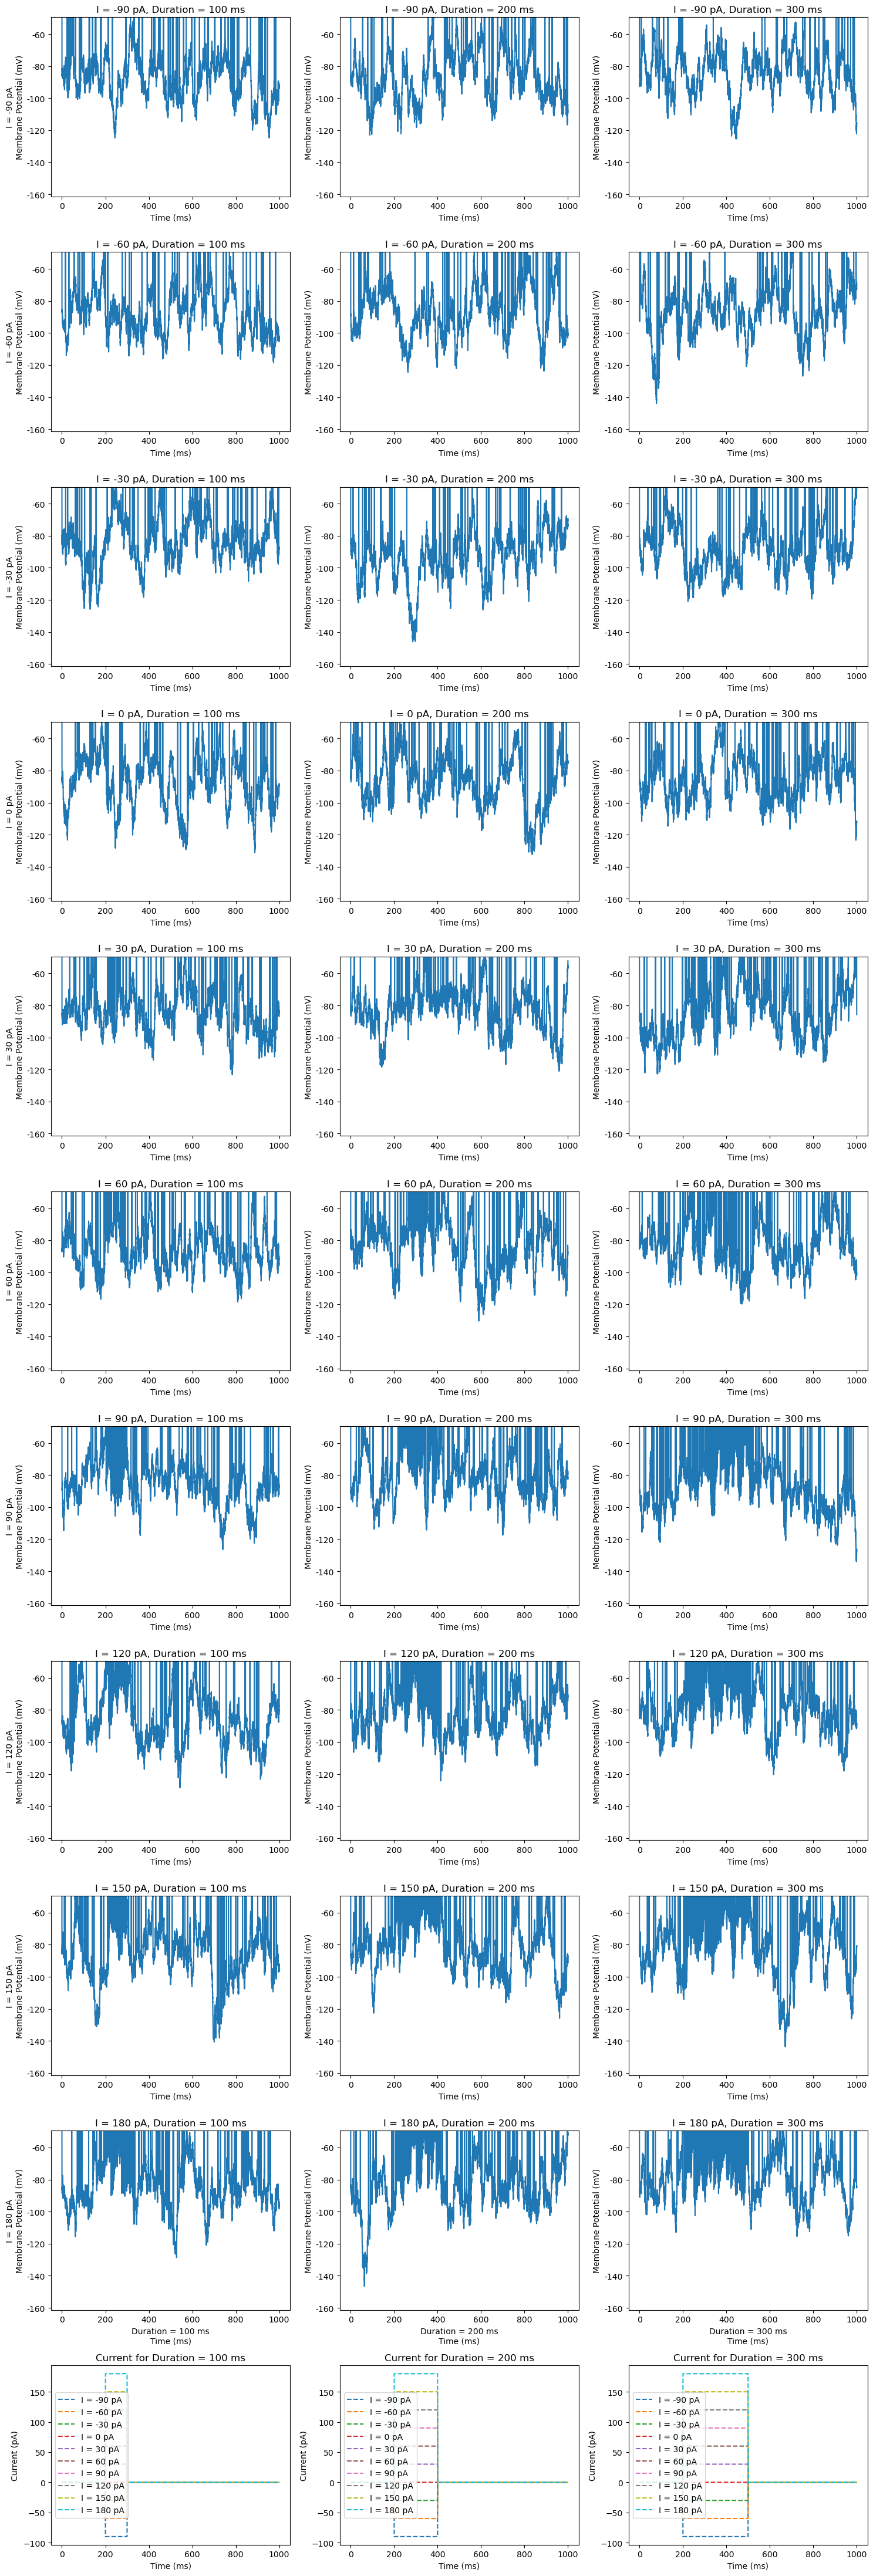

In [2]:
# Gaussian white noise (GWN) current 
 
json_file = './params/LIF_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

<Figure size 1500x800 with 0 Axes>

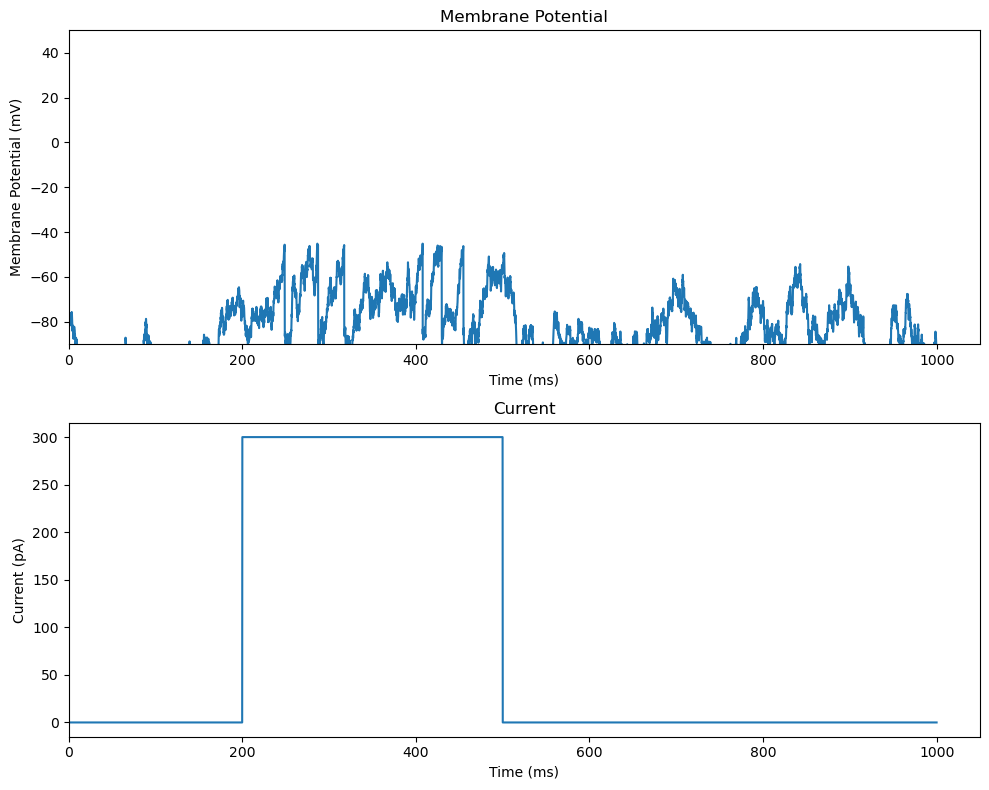

In [4]:
# GWN with LIF model 
from simulation_runner import plot_results, run_simulation_noise, load_params

json_file = './params/LIF_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  

# simulation 
results, noise_data = run_simulation_noise(N, params, model_name)

# visualization
plot_results(results)

### Synapse Connection

INFO       The synaptic equation for the variable g does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]


{'g_L': 10. * nsiemens, 'E_L': -80.2 * mvolt, 'Delta_T': 16.2 * mvolt, 'vt': -64. * mvolt, 'vr': -70. * mvolt, 'tau_w': 0.333 * second, 'th': 15. * mvolt, 'a': 300. * psiemens, 'd': 50. * famp, 'C': 60. * pfarad, 'I': 50. * pamp}


INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


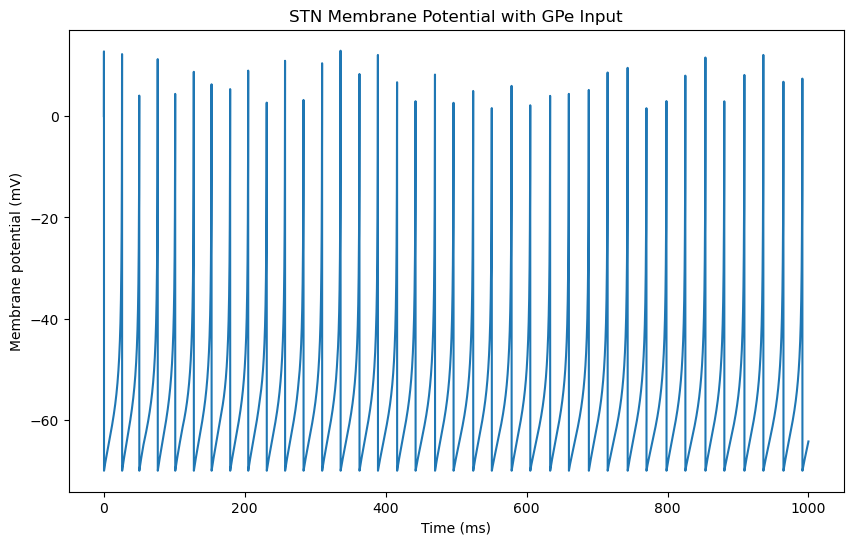

In [1]:
### GPe(T1 - STN)

from simulation_runner_syn import run_simulation, plot_results
from brian2 import *

# Define paths to parameter files
gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'w': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV,
    'delay': 1*ms
}

# Run simulation with specified N for each neuron group
N_GPe = 30  
N_STN = 30  

results = run_simulation(
    N_GPe, 
    N_STN, 
    gpe_params_file, 
    stn_params_file, 
    synapse_params, 
    'GPe', 
    'STN', 
    'GPe_STN'
)

plot_results(results)

{'g_L': 10. * nsiemens, 'E_L': -80.2 * mvolt, 'Delta_T': 16.2 * mvolt, 'vt': -64. * mvolt, 'vr': -70. * mvolt, 'tau_w': 0.333 * second, 'th': 15. * mvolt, 'a': 300. * psiemens, 'd': 50. * famp, 'C': 60. * pfarad, 'I': 50. * pamp}


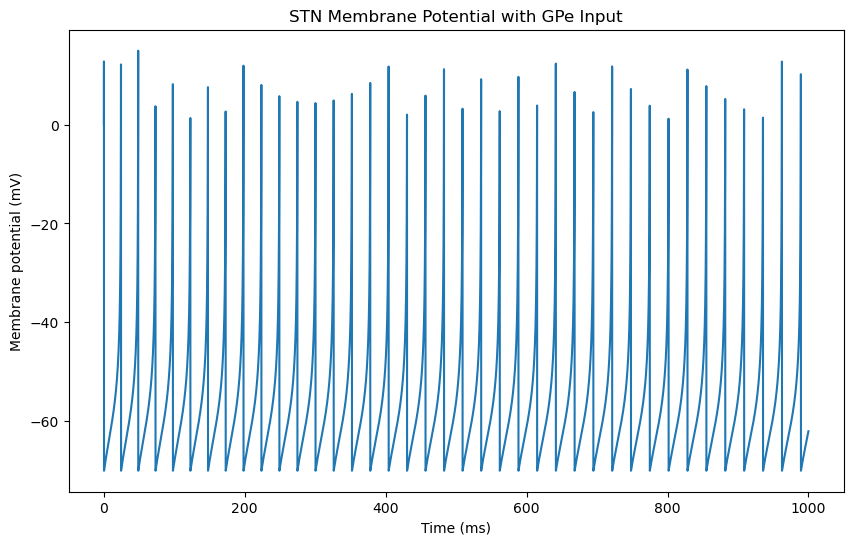

In [2]:
### GPe(TA - STN)
gpe_params_file = './params_ref/GPe_TA_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'w': 0*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV,
    'delay': 1*ms
}

N_GPe = 30 
N_STN = 30  

results = run_simulation(
    N_GPe, 
    N_STN, 
    gpe_params_file, 
    stn_params_file, 
    synapse_params, 
    'GPe', 
    'STN', 
    'GPe_STN'
)

plot_results(results)

INFO:root:building '_cython_magic_a42829e96d81dbadc7b80e24bb901c33' extension
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -ftree-vectorize -fPIC -fstack-protector-strong -O2 -pipe -fPIE -isystem /opt/anaconda3/envs/brain/include -D_FORTIFY_SOURCE=2 -isystem /opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/lib/python3.9/site-packages/numpy/core/include -I/opt/anaconda3/envs/brain/lib/python3.9/site-packages/brian2/synapses -I/opt/anaconda3/envs/brain/include/python3.9 -c /Users/tacolab4/Library/Caches/cython/brian_extensions/_cython_magic_a42829e96d81dbadc7b80e24bb901c33.cpp -o /Users/tacolab4/Library/Caches/cython/brian_extensions/Users/tacolab4/Library/Caches/cython/brian_extensions/_cython_magic_a42829e96d81dbadc7b80e24bb901c33.o -w

<Figure size 1500x800 with 0 Axes>

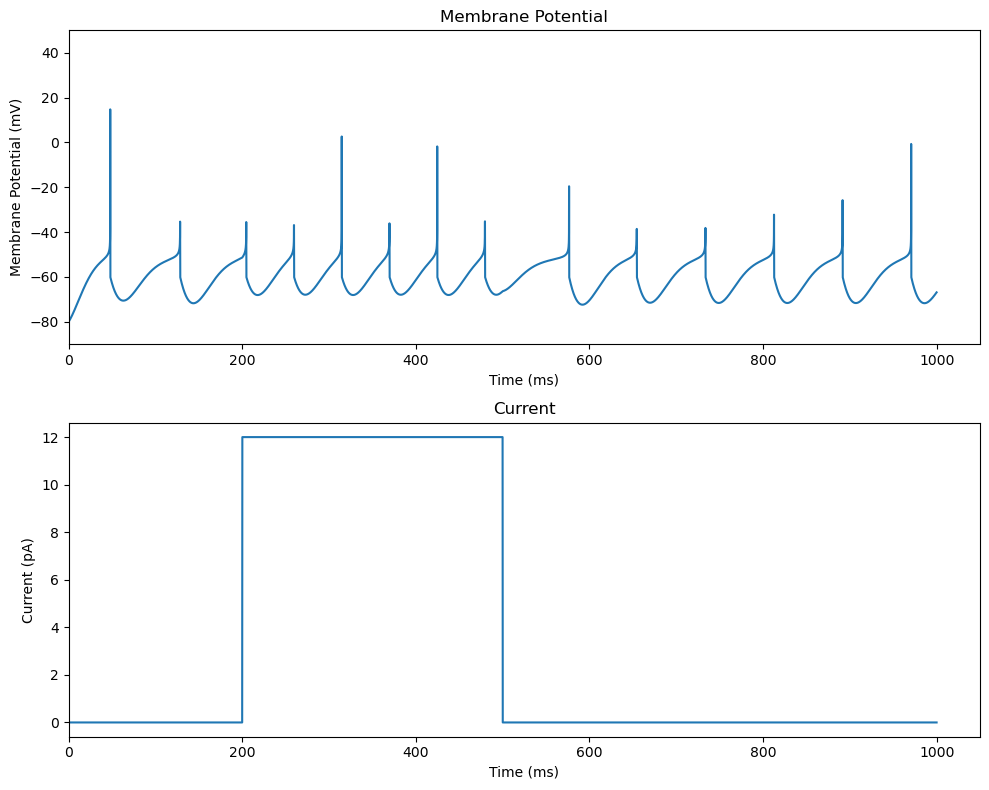

In [10]:
### GPe simulation
from simulation_runner import plot_results, run_simulation, load_params

json_file = './params_ref/GPe_TA_1.json' 

params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

results = run_simulation(N, params, model_name)

plot_results(results)

INFO       The synaptic equation for the variable g does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


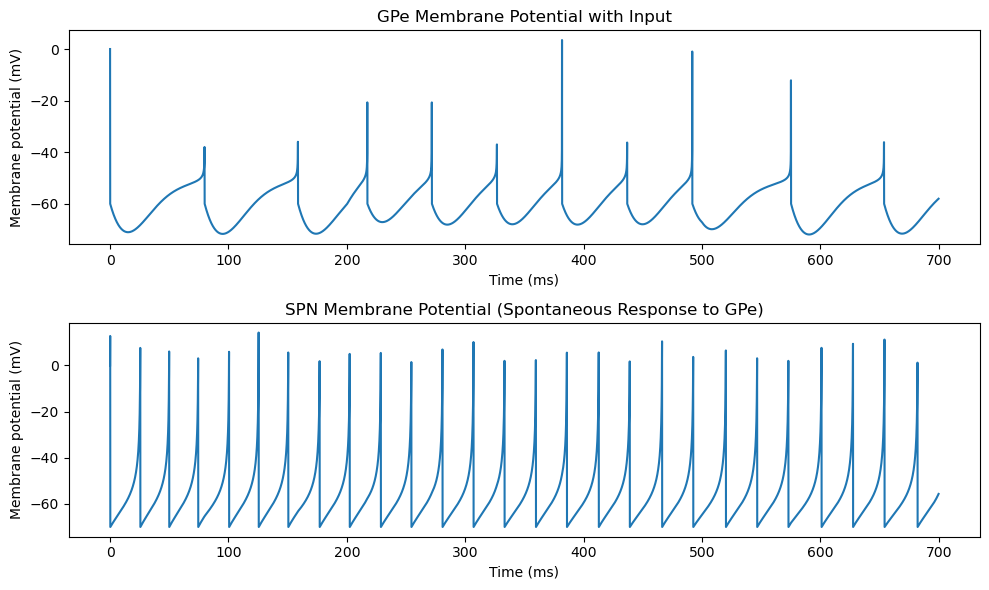

In [1]:
### Spontaneuous result without I
from simulation_runner_syn import run_simulation_with_input, plot_results_with_input
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
spn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_SPN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_SPN,
    gpe_params_file,
    spn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_with_input(results)

<Figure size 1500x800 with 0 Axes>

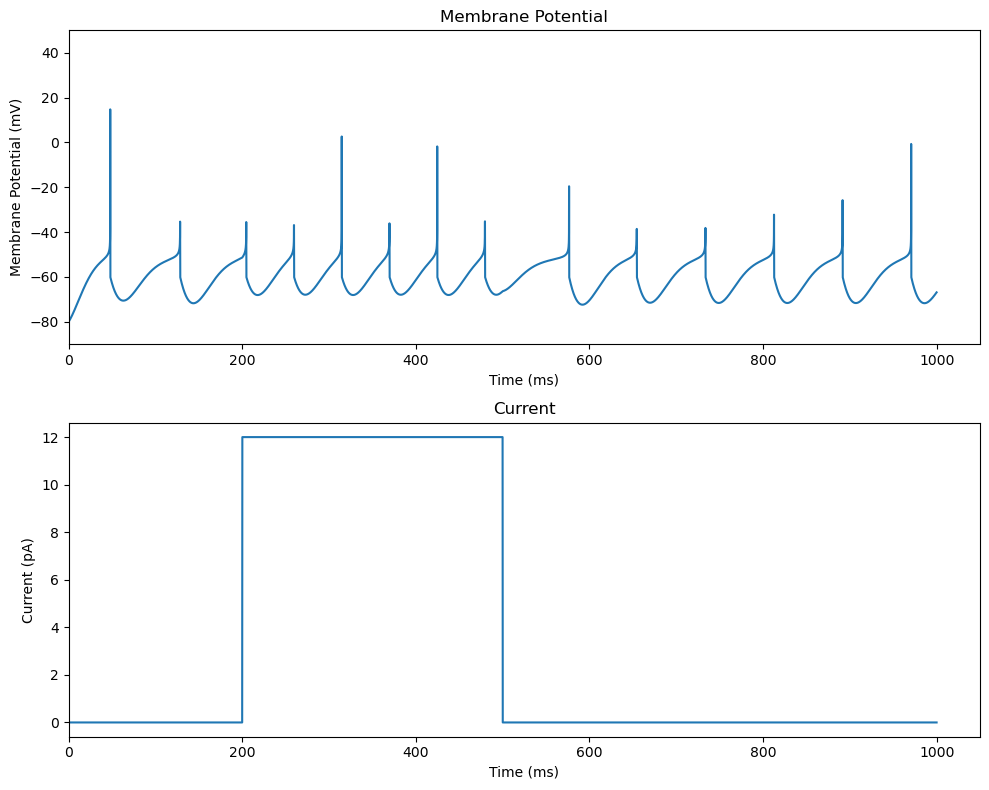

In [2]:
# GWN with LIF model 
from simulation_runner import plot_results, run_simulation, load_params

json_file = './params_ref/GPe_T1_1.json'

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

INFO       The synaptic equation for the variable g does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


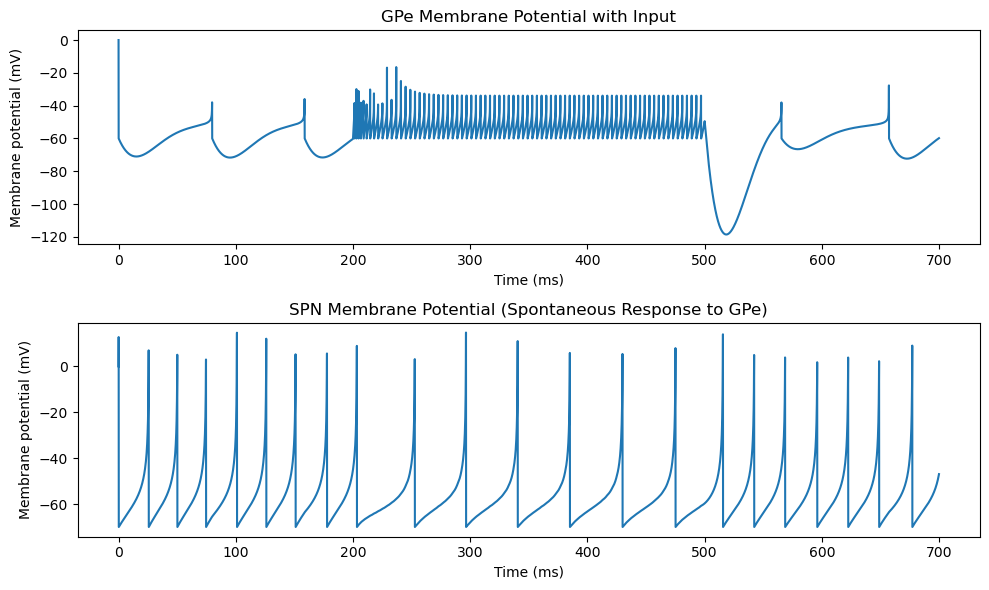

In [1]:
### Spontaneuous result without I
from simulation_runner_syn import run_simulation_with_input, plot_results_with_input
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1_spike.json'
spn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_SPN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_SPN,
    gpe_params_file,
    spn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_with_input(results)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]


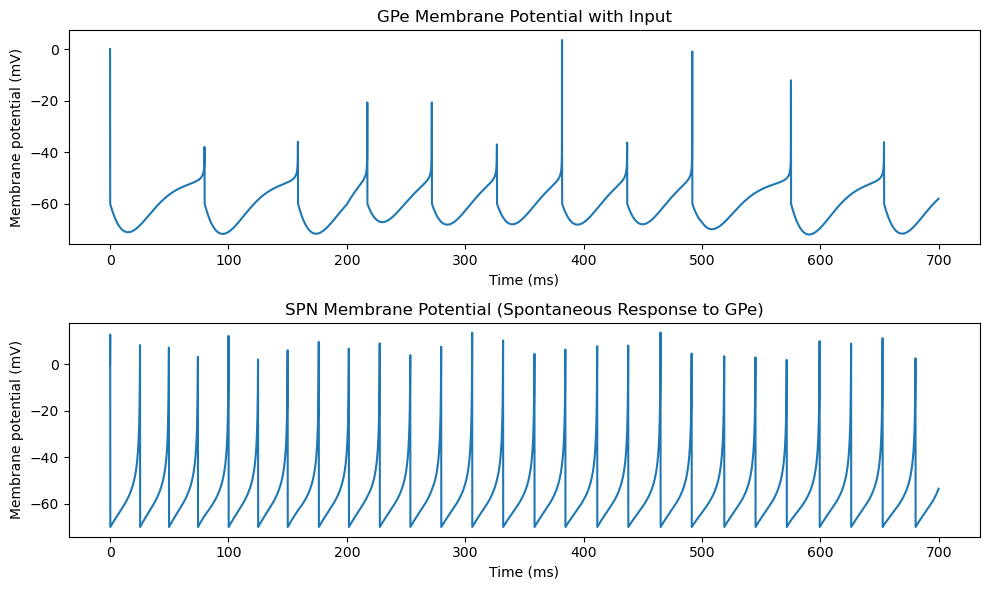

In [3]:
### Spontaneuous result with current I (200ms ~ 500msxcqz)
from simulation_runner_syn import run_simulation_with_input, plot_results_with_input, plot_connectivity
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
spn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_SPN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_SPN,
    gpe_params_file,
    spn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_with_input(results)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]


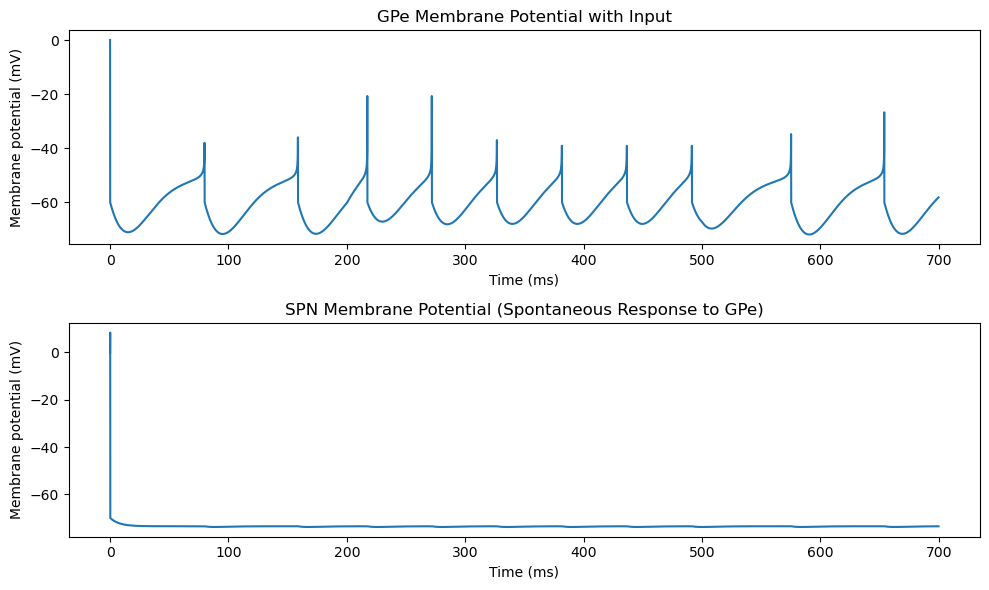

In [2]:

gpe_params_file = './params_ref/GPe_T1_3.json'
spn_params_file = './params_ref/STN_3.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_SPN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_SPN,
    gpe_params_file,
    spn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_with_input(results)

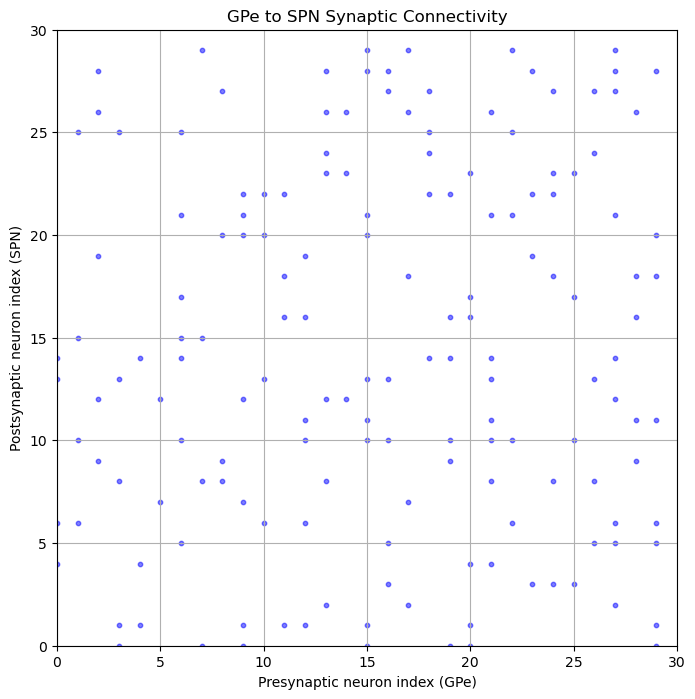

In [4]:
from simulation_runner_syn import plot_connectivity
plot_connectivity(results['synapse'], N_GPe, N_SPN, title='GPe to SPN Synaptic Connectivity')

- STDP: normal vs dopamine 
- https://brian2.readthedocs.io/en/stable/examples/frompapers.Izhikevich_2007.html

- AdEX parameter list
- https://brian2.readthedocs.io/en/stable/examples/frompapers.Naud_et_al_2008_adex_firing_patterns.html